# KDD Cup 2010 —— Data Analysis on algebra_2006_2007_train

## Data Description

### Column Description

| Attribute | Annotaion |
|:--:|---|
|Row|The row number|
| Anon Student Id             | Unique, anonymous identifier for a student    |
| Problem Hierarchy           | The hierarchy of curriculum levels containing the problem |
| Problem Name                | Unique identifier for a problem |
| Problem View                | The total number of times the student encountered the problem so far |
| Step Name                   | Unique identifier for one of the steps in a problem |
| Step Start Time             | The starting time of the step (Can be null) |
| First Transaction Time      | The time of the first transaction toward the step |
| Correct Transaction Time    | The time of the correct attempt toward the step, if there was one |
| Step End Time               | The time of the last transaction toward the step |
| Step Duration (sec)         | The elapsed time of the step in seconds, calculated by adding all of the durations for transactions that were attributed to the step (Can be null if step start time is null) |
| Correct Step Duration (sec) | The step duration if the first attempt for the step was correct |
| Error Step Duration (sec)   | The step duration if the first attempt for the step was an error (incorrect attempt or hint request) |
| Correct First Attempt       | The tutor's evaluation of the student's first attempt on the step—1 if correct, 0 if an error |
| Incorrects                  | Total number of incorrect attempts by the student on the step |
| Hints                       | Total number of hints requested by the student for the step |
| Corrects                    | Total correct attempts by the student for the step (only increases if the step is encountered more than once) |
| KC(KC Model Name)           | The identified skills that are used in a problem, where available |
| Opportunity(KC Model Name)  | A count that increases by one each time the student encounters a step with the listed knowledge component |
|| Additional KC models, which exist for the challenge data sets, will appear as additional pairs of columns (KC and Opportunity columns for each model) |

For the test portion of the challenge data sets, values will not be provided for the following columns:

&diams; Step Start Time

&diams; First Transaction Time

&diams; Correct Transaction Time

&diams; Step End Time

&diams; Step Duration (sec)

&diams; Correct Step Duration (sec)

&diams; Error Step Duration (sec)

&diams; Correct First Attempt

&diams; Incorrects

&diams; Hints

&diams; Corrects

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
path = "algebra_2006_2007_train.txt"
data = pd.read_table(path, encoding="ISO-8859-15", low_memory=False)

## Record Examples

In [3]:
pd.set_option('display.max_column', 500)
data.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1,JG4Tz,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R1C1,2006-10-26 09:51:58.0,2006-10-26 09:52:30.0,2006-10-26 09:53:30.0,2006-10-26 09:53:30.0,92.0,NaN,92.0,0,2,0,1,NaN,NaN
1,2,JG4Tz,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R1C2,2006-10-26 09:53:30.0,2006-10-26 09:53:41.0,2006-10-26 09:53:41.0,2006-10-26 09:53:41.0,11.0,11.0,NaN,1,0,0,1,NaN,NaN
2,3,JG4Tz,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R2C1,2006-10-26 09:53:41.0,2006-10-26 09:53:46.0,2006-10-26 09:53:46.0,2006-10-26 09:53:46.0,5.0,5.0,NaN,1,0,0,1,Identifying units,1
3,4,JG4Tz,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R2C2,2006-10-26 09:53:46.0,2006-10-26 09:53:50.0,2006-10-26 09:53:50.0,2006-10-26 09:53:50.0,4.0,4.0,NaN,1,0,0,1,Identifying units,2
4,5,JG4Tz,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R4C1,2006-10-26 09:53:50.0,2006-10-26 09:54:05.0,2006-10-26 09:54:05.0,2006-10-26 09:54:05.0,15.0,15.0,NaN,1,0,0,1,Entering a given,1


In [4]:
data.describe()

,Row,Problem View,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects
count,2.270384e+06,2.270384e+06,2.267551e+06,1.751638e+06,515913.000000,2.270384e+06,2.270384e+06,2.270384e+06,2.270384e+06
mean,1.513120e+06,1.092910e+00,1.958364e+01,1.171716e+01,46.292087,7.722359e-01,4.455044e-01,1.184311e-01,1.062878e+00
std,8.736198e+05,3.448857e-01,4.768345e+01,2.645318e+01,81.817794,4.193897e-01,2.000914e+00,6.199071e-01,6.894285e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.577408e+05,1.000000e+00,3.000000e+00,3.000000e+00,11.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.511844e+06,1.000000e+00,7.000000e+00,5.000000e+00,22.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.269432e+06,1.000000e+00,1.700000e+01,1.100000e+01,47.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,3.025933e+06,1.000000e+01,3.208000e+03,1.204000e+03,3208.000000,1.000000e+00,3.600000e+02,1.020000e+02,9.200000e+01


In [5]:
print("Part of missing values for every column")
print(data.isnull().sum() / len(data))

Part of missing values for every column
Row                            0.000000
Anon Student Id                0.000000
Problem Hierarchy              0.000000
Problem Name                   0.000000
Problem View                   0.000000
Step Name                      0.000000
Step Start Time                0.001103
First Transaction Time         0.000000
Correct Transaction Time       0.034757
Step End Time                  0.000000
Step Duration (sec)            0.001248
Correct Step Duration (sec)    0.228484
Error Step Duration (sec)      0.772764
Correct First Attempt          0.000000
Incorrects                     0.000000
Hints                          0.000000
Corrects                       0.000000
KC(Default)                    0.203407
Opportunity(Default)           0.203407
dtype: float64


In [6]:
print("the number of records:")
print(len(data))

the number of records:
2270384


In [7]:
print("how many students are there in the table:")
print(len(data['Anon Student Id'].unique()))

how many students are there in the table:
1338


In [8]:
print("how many problems are there in the table:")
print(len(data['Problem Name'].unique()))

how many problems are there in the table:
91913


## Sort by Anon Student Id

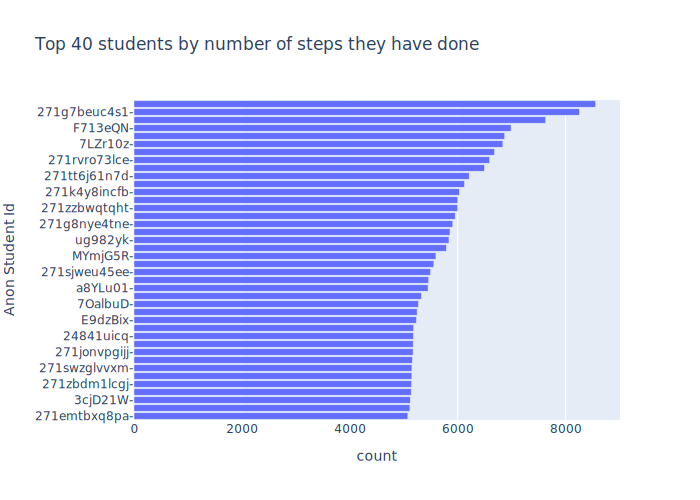

In [9]:
ds = data['Anon Student Id'].value_counts().reset_index()
ds.columns = [
    'Anon Student Id',
    'count'
]
ds['Anon Student Id'] = ds['Anon Student Id'].astype(str) + '-'
ds = ds.sort_values('count').tail(40)

fig = px.bar(
    ds,
    x='count',
    y='Anon Student Id',
    orientation='h',
    title='Top 40 students by number of steps they have done'
)
fig.show("svg")

## Percent of corrects, hints and incorrects

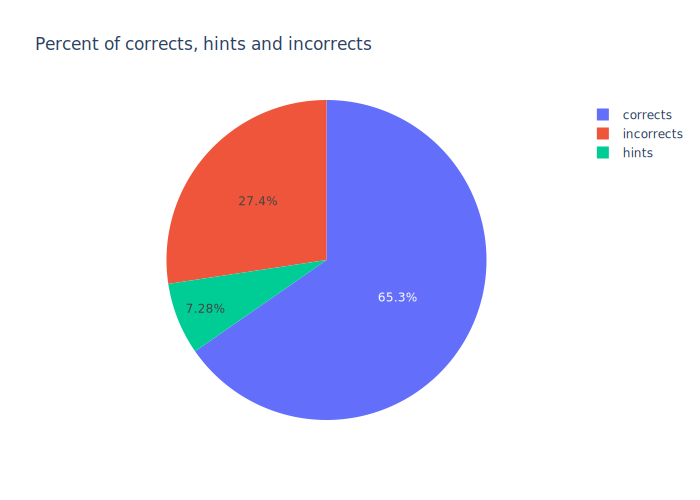

In [10]:
count_corrects = data['Corrects'].sum()
count_hints = data['Hints'].sum()
count_incorrects = data['Incorrects'].sum()

total = count_corrects + count_hints + count_incorrects

percent_corrects = count_corrects / total
percent_hints = count_hints / total
percent_incorrects = count_incorrects / total

dfl = [['corrects', percent_corrects], ['hints', percent_hints], ['incorrects', percent_incorrects]]

df = pd.DataFrame(dfl, columns=['transaction type', 'percent'])

fig = px.pie(
    df,
    names=['corrects', 'hints', 'incorrects'],
    values='percent',
    title='Percent of corrects, hints and incorrects'
)
fig.show("svg")

## Sort by Problem Name

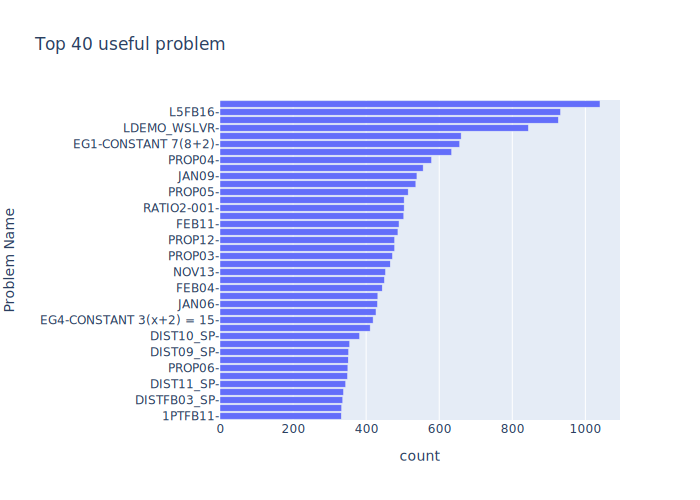

In [11]:
storeProblemCount = [1]
storeProblemName = [data['Problem Name'][0]]
currentProblemName = data['Problem Name'][0]
currentStepName = [data['Step Name'][0]]
lastIndex = 0

for i in range(1, len(data), 1):
    pbNameI = data['Problem Name'][i]
    stNameI = data['Step Name'][i]
    if pbNameI != data['Problem Name'][lastIndex]:
        currentStepName = [stNameI]
        currentProblemName = pbNameI
        if pbNameI not in storeProblemName:
            storeProblemName.append(pbNameI)
            storeProblemCount.append(1)
        else:
            storeProblemCount[storeProblemName.index(pbNameI)] += 1
        lastIndex = i
    elif stNameI not in currentStepName:
        currentStepName.append(stNameI)
        lastIndex = i
    else:
        currentStepName = [stNameI]
        storeProblemCount[storeProblemName.index(pbNameI)] += 1
        lastIndex = i

dfData = {
    'Problem Name': storeProblemName,
    'count': storeProblemCount
}
df = pd.DataFrame(dfData).sort_values('count').tail(40)
df["Problem Name"] += '-'

fig = px.bar(
    df,
    x='count',
    y='Problem Name',
    orientation='h',
    title='Top 40 useful problem'
)
fig.show("svg")

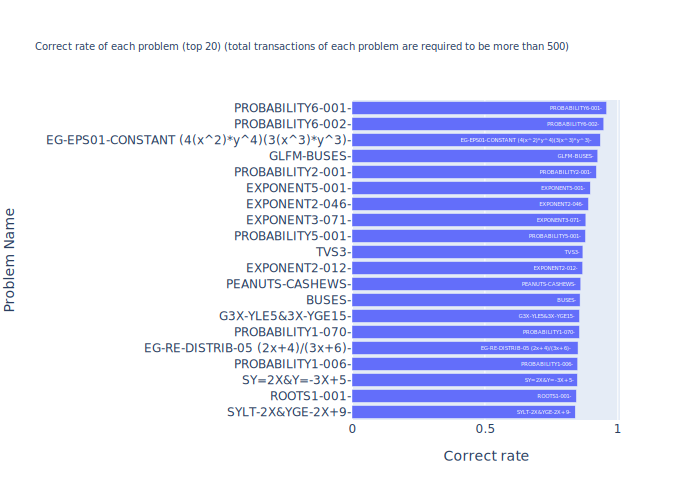

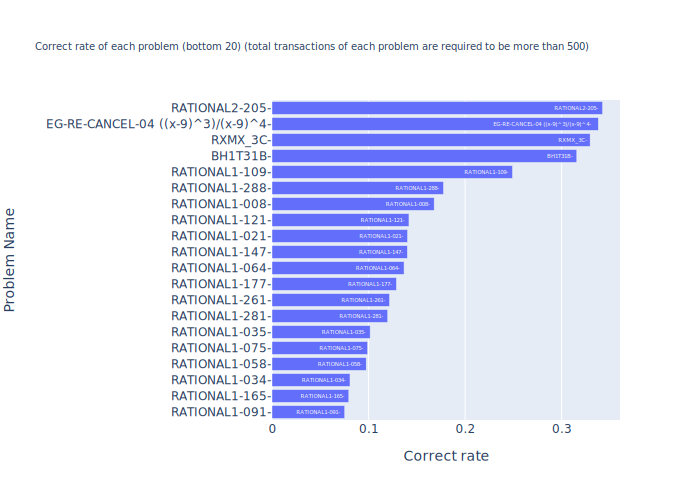

In [12]:
data['total transactions'] = data['Incorrects'] + data['Hints'] + data['Corrects']
df1 = data.groupby('Problem Name')['total transactions'].sum().reset_index()
df2 = data.groupby('Problem Name')['Corrects'].sum().reset_index()
df1['Corrects'] = df2['Corrects']
df1['Correct rate'] = df1['Corrects'] / df1['total transactions']

df1 = df1.sort_values('total transactions')
count = 0
standard = 500
for i in df1['total transactions']:
    if i > standard:
        count += 1
df1 = df1.tail(count)

df1 = df1.sort_values('Correct rate')

df1['Problem Name'] = df1['Problem Name'].astype(str) + "-"

df_px = df1.tail(20)

fig = px.bar(
    df_px,
    x='Correct rate',
    y='Problem Name',
    orientation='h',
    title='Correct rate of each problem (top 20)  (total transactions of \
each problem are required to be more than 500)',
    text='Problem Name'
)
fig.update_layout(title_font_size=10)
fig.show("svg")

df_px = df1.head(20)

fig = px.bar(
    df_px,
    x='Correct rate',
    y='Problem Name',
    orientation='h',
    title='Correct rate of each problem (bottom 20)  (total transactions of \
each problem are required to be more than 500)',
    text='Problem Name'
)
fig.update_layout(title_font_size=10)
fig.show("svg")

These two figures present the correct rate of problems. Problems with low correct rate deserve more attention from teachers and students.

## Sort by KC

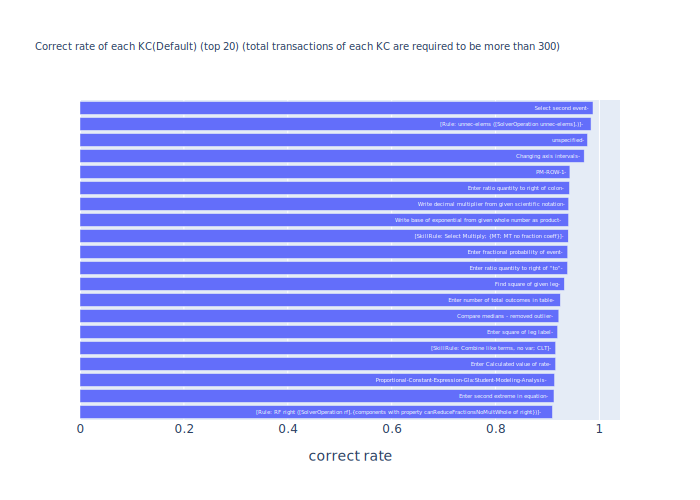

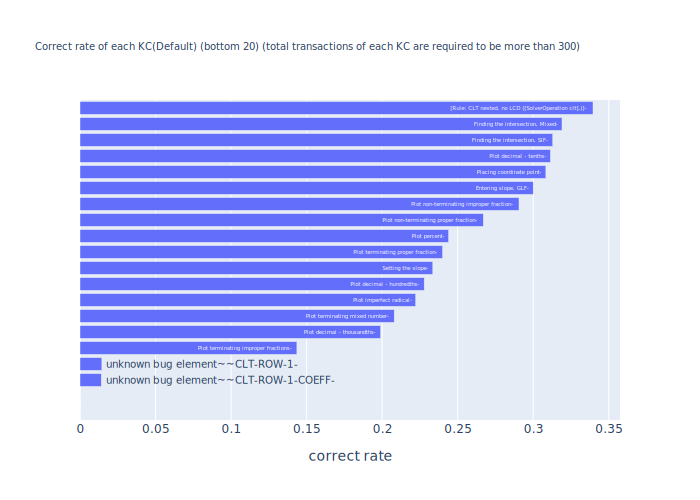

In [13]:
data.dropna(subset=['KC(Default)'], inplace=True)

data['total transactions'] = data['Corrects'] + data['Hints'] + data['Incorrects']
df1 = data.groupby('KC(Default)')['total transactions'].sum().reset_index()
df2 = data.groupby('KC(Default)')['Corrects'].sum().reset_index()
df1['Corrects'] = df2['Corrects']
df1['correct rate'] = df1['Corrects'] / df1['total transactions']

count = 0
standard = 300
for i in df1['total transactions']:
    if i > standard:
        count += 1
df1 = df1.sort_values('total transactions').tail(count)

df1 = df1.sort_values('correct rate')

df1['KC(Default)'] = df1['KC(Default)'].astype(str) + '-'

df_px = df1.tail(20)

fig = px.bar(
    df_px,
    x='correct rate',
    y='KC(Default)',
    orientation='h',
    title='Correct rate of each KC(Default) (top 20)  (total transactions of \
each KC are required to be more than 300)',
    text='KC(Default)'
)
fig.update_yaxes(visible=False)
fig.update_layout(title_font_size=10)
fig.show("svg")

df_px = df1.head(20)

fig = px.bar(
    df_px,
    x='correct rate',
    y='KC(Default)',
    orientation='h',
    title='Correct rate of each KC(Default) (bottom 20)  (total transactions of \
each KC are required to be more than 300)',
    text='KC(Default)'
)
fig.update_yaxes(visible=False)
fig.update_layout(title_font_size=10)
fig.show("svg")

These two figures present the correct rate of KCs. KCs with low correct rate deserve more attention from teachers and students.

## Postscript

Given that the whole data package is composed of 5 data sets and data files in these 5 data sets that can be used to conduct data analysis share the same data format, the following analysis based on "algebra_2006_2007_train" is just an example of data analysis on KDD Cup, and the code can be used to analyse other data files with some small changes on the file path and column names.
